# Where NOT to move in San Francisco

## Preparing the data

Let's see first a sample of the data that we are going to work with.


In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
%pylab inline

sanfrancisco = pd.read_csv("sanfrancisco.csv")
sanfrancisco.head(3)


Populating the interactive namespace from numpy and matplotlib


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244


For analyzing this data I have used python and python libraries for creating visualization (Bokeh and Matplotlib). 
The first step was to turn the csv file into more manageable objects. I have turned the data from the file into a list of objects.

# The most common crimes in San Francisco 

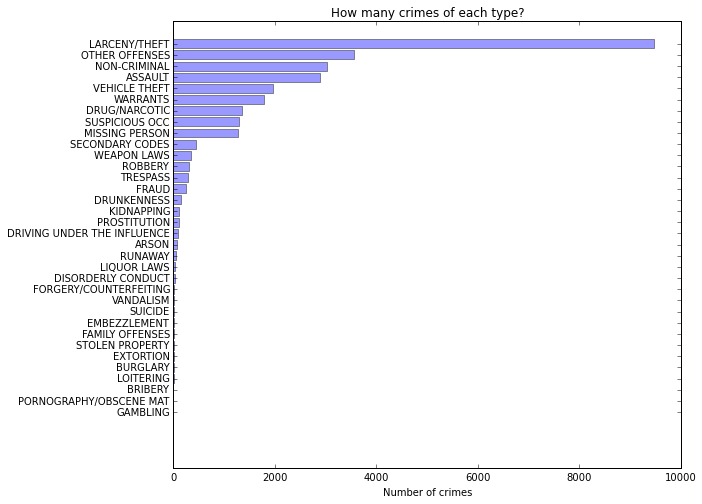

In [3]:
reader = csv.DictReader(open('sanfrancisco.csv'))
typeOfCrime = []
result = []

def findCrime(crime, typeOfCrime):
    for c in typeOfCrime:
        for cr, num in c.iteritems():
            if cr == crime:
                return c
    return None

def getKey(item):
    for cr, num in item.iteritems():
        return num

for row in reader:
     obj = {}
     for column, value in row.iteritems():
         obj[column] = value
     result.append(obj)
     c = findCrime(obj["Category"], typeOfCrime)
     if c == None:
            crime = {obj["Category"]:1}
            typeOfCrime.append(crime)
     else:
        for idx,x in enumerate(typeOfCrime):
            for key, value in x.items():
                if key == obj["Category"]:
                    y = value +1
                    typeOfCrime[idx] = {key:y}
typeOfCrime = sorted(typeOfCrime, key=getKey)
crimes = []
values = []
for c in typeOfCrime:
    for key, value in c.items():
        crimes.append(key)
        values.append(value)
y_pos = np.arange(len(crimes))
        
fig = plt.figure(figsize=(20,8))
fig.add_subplot(121)
plt.barh(y_pos,values, align='center', alpha = 0.4)
plt.yticks(y_pos,crimes)
plt.rc('ytick', labelsize=9) 
plt.xlabel("Number of crimes")
plt.title("How many crimes of each type?")
plt.show()

We have sorted the types of crimes based on their number of occurances, so we can notice that the most common ofences are larceny/theft, other offenses, non-criminal, assault and vehicle theft.

# Where NOT to buy a house in San Francisco


The X and Y columns will help in placing the events on a map. The color attribute represents the type of crime that was committed. We will map the top five most common crimes.
Red for Larceny/Theft, blue for other offenses, green for non-criminal, yellow for assault and black for vehicle theft.

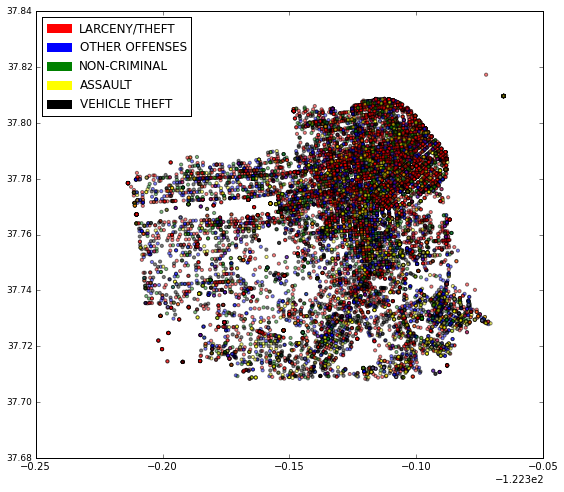

In [23]:

fig = plt.figure(figsize=(20,8))
fig.add_subplot(122)
x = []
y = []
c = []
l = []
for item in result:
    if (item["Category"] == "LARCENY/THEFT" or item["Category"] == "OTHER OFFENSES" or item["Category"] == "NON-CRIMINAL" or item["Category"] == "ASSAULT" or item["Category"] == "VEHICLE THEFT"):
        x.append(item["X"])
        y.append(item["Y"])
        if item["Category"] == "LARCENY/THEFT":
            c.append('red')
        if item["Category"] == "OTHER OFFENSES":
            c.append('blue')
        if item["Category"] == "NON-CRIMINAL":
            c.append('green')
        if item["Category"] == "ASSAULT":
            c.append('yellow')
        if item["Category"] == "VEHICLE THEFT":
            c.append('black')
plt.scatter(x,y,s=10,  c=c,alpha=0.5)
red_patch = mpatches.Patch(color='red', label='LARCENY/THEFT')
blue_patch = mpatches.Patch(color='blue', label='OTHER OFFENSES')
green_patch = mpatches.Patch(color='green', label='NON-CRIMINAL')
yellow_patch = mpatches.Patch(color='yellow', label='ASSAULT')
black_patch = mpatches.Patch(color='black', label='VEHICLE THEFT')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch], loc=2)
plt.show()

We notice that there is a bigger number of crimes committed in the north-east side of San Francisco.

# Safest time of day in San Francisco

For finding out which is the safest time of day in San Francisco I have installed and used Bokeh. On the X axis there is the date and on the Y axis the time.

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "pic.PNG")

By night there is a greater incidence of crime. The safest time in a day in San Francisco is the time between 02:00-08:00am.

# Conclusions

After processing the data, we have found that:
<li> Most common crime in San Francisco is theft, followed by non-criminal crimes, assault and vehicle theft.
<li> North eastern side of San Francisco is an area you should avoid if you decide to move there.
<li> South western side is the place you would like to move if you want to be in a safer area
<li> Safest time of day in San Francisco is between 02:00 - 08:00 am